<a href="https://colab.research.google.com/github/nibbe99/AI-model-clothes-predictions/blob/main/Multi_class_classification_Predicting_clothings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Multiclass classification

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


10

plot a random image

Text(0.5, 1.0, 'T-shirt/top')

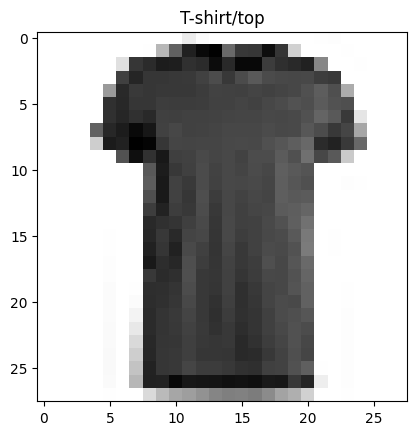

In [ ]:
#
plt.imshow(x_train[17], cmap=plt.cm.binary)
plt.title(class_names[y_train[17]])

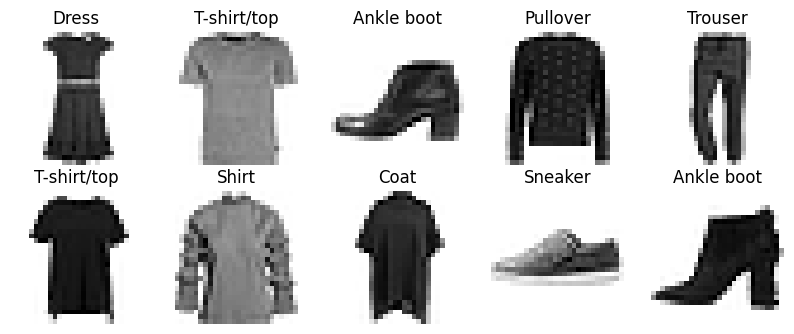

In [ ]:
#Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(10,10))
for i in range(10):
  plt.subplot(5,5,i+1)
  rand_index = random.choice(range(len(x_train)))
  plt.imshow(x_train[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[y_train[rand_index]])
  plt.axis(False)

#Building multi-class classification model

*   Input shape = 28 x 26  (x_train[0].shape)
*   Output shape = 10 len(class_names)
*   Loss function = tf.keras.losses.CategoricalCrossentropy()
*   Output layer activation = Softmax (NOT SIGMOID)
*   y_train = onehotEncoded => CategoricalCrossentropy ELSE SparseCategoricalCrossentropy

In [ ]:
y_predict = model1.predict(x_test)

In [ ]:
np.argmax(y_predict[4]), y_test[0:5]

(6, array([9, 2, 1, 1, 6], dtype=uint8))

In [ ]:
x_train.min(), x_train.max()

(0, 255)

#Normalized data is between 0 and 1

KEY!!!

In [ ]:
# data is too big, normalize it with noramilsation
x_train.min(), x_train.max()  # is from 0 - 255

(0, 255)

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
x_train.min(), x_train.max(), x_train.shape

(0.0, 1.0, (60000, 28, 28))

In [ ]:
#model2

tf.random.set_seed(42)

model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(50, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
])

model2.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics= ["accuracy"])

history = model2.fit(x_train, y_train, epochs = 15, validation_data=(x_test, y_test))

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7710 - loss: 0.6587 - val_accuracy: 0.8443 - val_loss: 0.4253
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8604 - loss: 0.3859 - val_accuracy: 0.8571 - val_loss: 0.3953
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8738 - loss: 0.3438 - val_accuracy: 0.8604 - val_loss: 0.3783
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8823 - loss: 0.3194 - val_accuracy: 0.8667 - val_loss: 0.3627
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8894 - loss: 0.3014 - val_accuracy: 0.8707 - val_loss: 0.3559
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8957 - loss: 0.2845 - val_accuracy: 0.8692 - val_loss: 0.3639
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8985 - loss: 0.2718 - val_accuracy: 0.8682 - val_loss: 0.3616
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9029 - loss: 0.2606 

In [ ]:
y_predict2 = model2.predict(x_test)
np.argmax(y_predict2[4]), y_test[0:10]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


(0, array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8))

<Axes: >

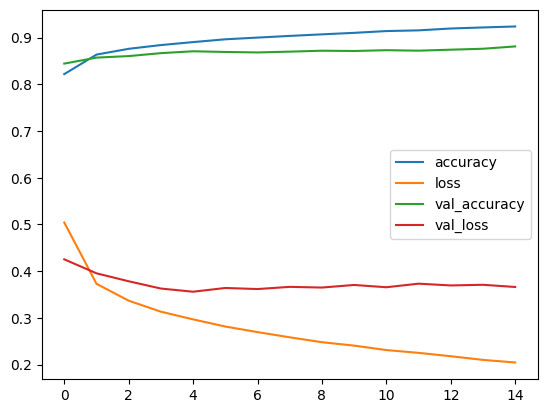

In [ ]:
pd.DataFrame(history.history).plot()

#Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

y_preds = model2.predict(x_test)
y_preds = np.argmax(y_preds, axis = 1)

y_preds[0:10]

confusion_matrix(y_test, y_preds)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[841,   4,  18,  16,   3,   0, 107,   1,  10,   0],
       [  1, 973,   1,  15,   4,   0,   6,   0,   0,   0],
       [ 18,   4, 841,  12,  77,   0,  48,   0,   0,   0],
       [ 24,  11,  14, 868,  40,   0,  38,   0,   5,   0],
       [  1,   0, 126,  25, 814,   0,  32,   0,   2,   0],
       [  0,   0,   0,   1,   0, 943,   0,  33,   1,  22],
       [116,   3, 132,  17,  79,   0, 649,   0,   4,   0],
       [  0,   0,   0,   0,   0,   8,   0, 973,   1,  18],
       [  7,   3,   3,   3,   4,   1,  12,   4, 963,   0],
       [  0,   0,   0,   1,   0,   5,   1,  46,   1, 946]])

In [ ]:
model2.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8790 - loss: 0.3770


[0.36607223749160767, 0.8810999989509583]

In [ ]:
import itertools

def createConfusionMatrix(y_true, y_preds, classes=None, figsize=(10,10), text_size = 15):

#Create the foncusion matrix
  cm = confusion_matrix(y_true, y_preds)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
  n_classes = cm.shape[0]
  #Make it prettier
  fig, ax = plt.subplots(figsize=figsize)
  #Crate a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  #Create classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

#Labels the axes
  ax.set(title = "Confusion Matrix",
       xlabel = "Predicted",
       ylabel = "True Label",
       xticks = np.arange(n_classes),
       yticks = np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom

  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

#Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

# Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

#plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j] * 100:.1f}%)",
           horizontalalignment="center",
           color = "white" if cm[i, j] > threshold else "black",
           size = text_size)

#Results

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'

  plt.xlabel("pred: {} {:2.0f}% (True:{}) ".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)



In [ ]:

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  #plt.figsize=(8,6)
  plt.grid(False)
  plt.xticks(range(10), class_names, rotation = 55)
  plt.xticks(fontsize=8)
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="red")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('green')

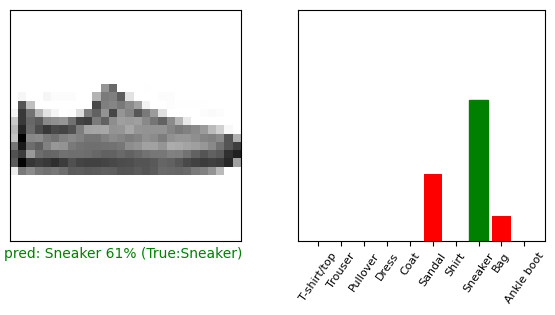

In [ ]:
i = 12
plt.figure(figsize=(7,3))
plt.subplot(1,2,1)
plot_image(i, y_predict2[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, y_predict2[i],  y_test)

plt.show()

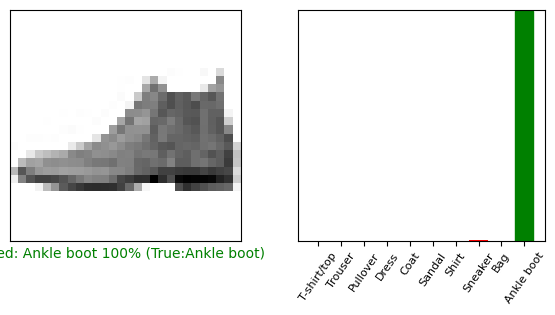

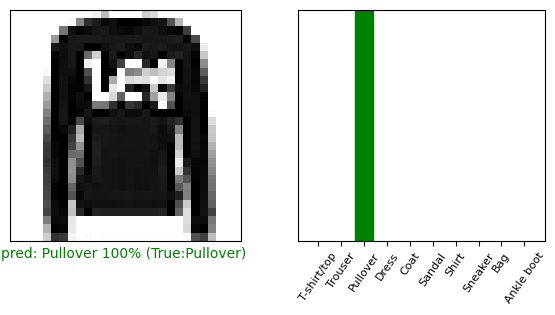

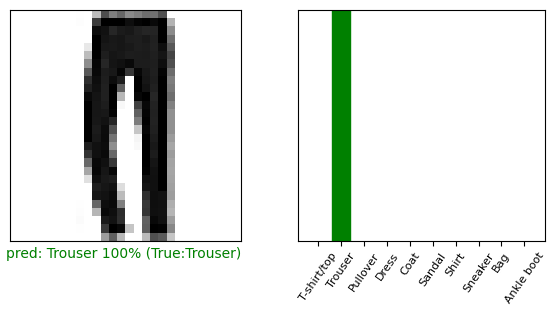

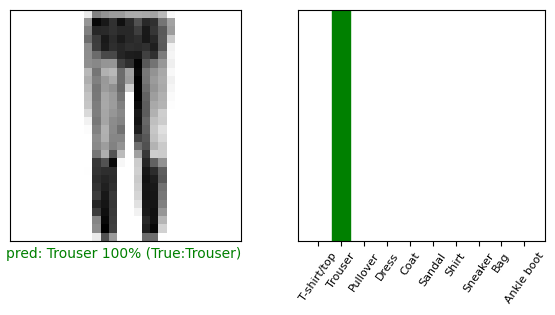

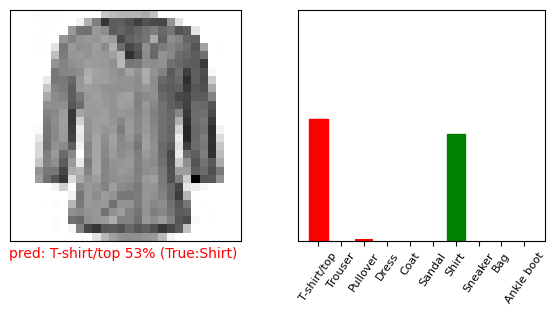

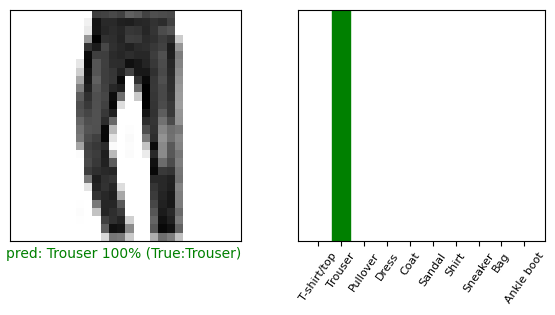

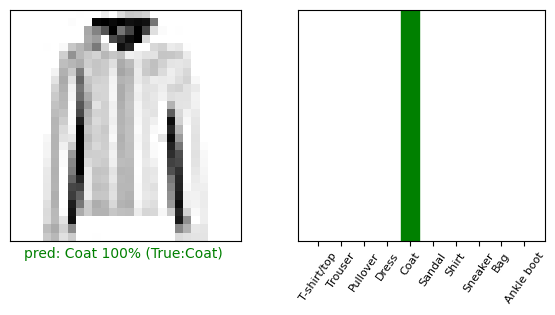

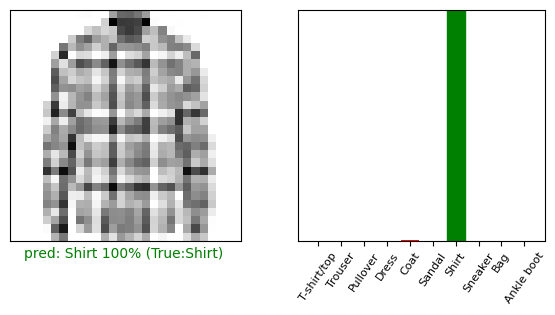

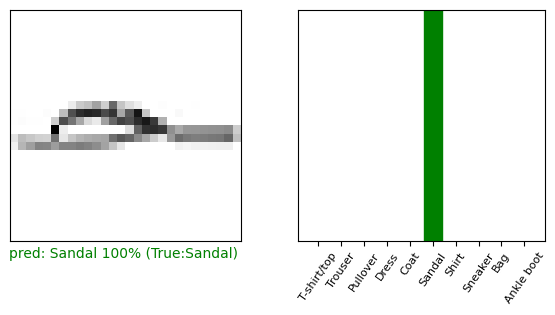

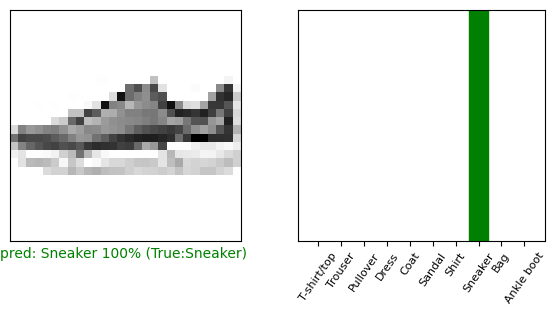

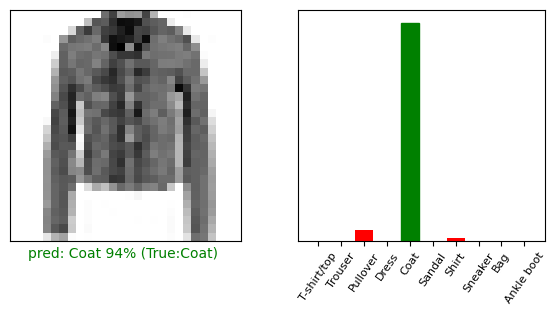

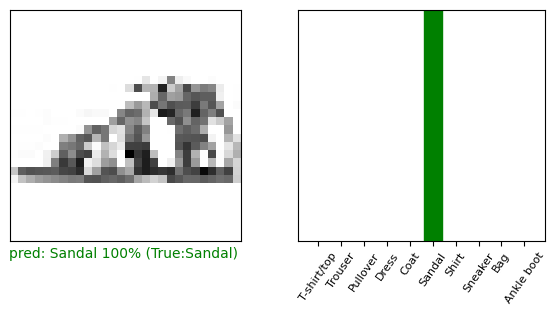

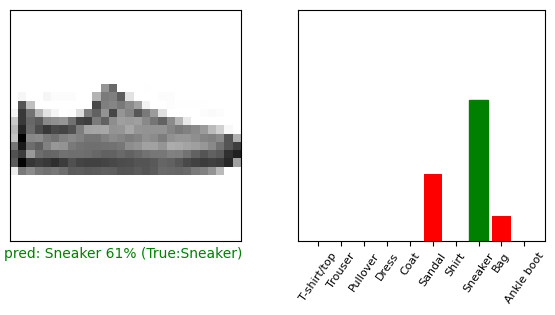

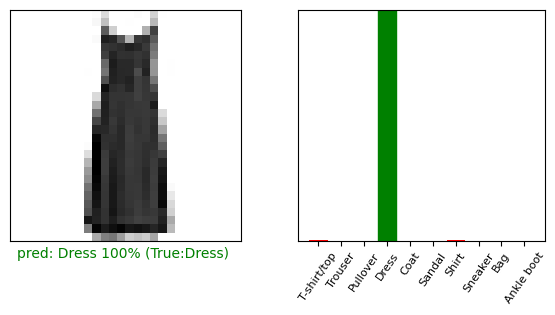

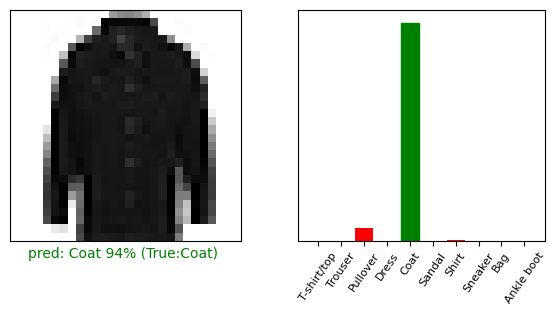

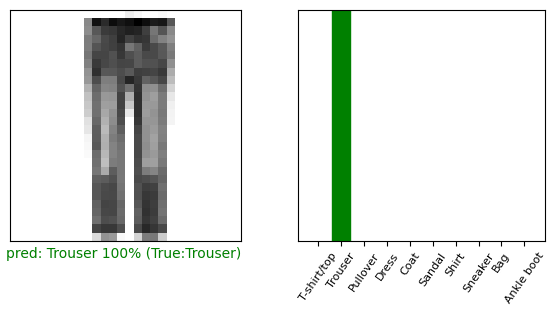

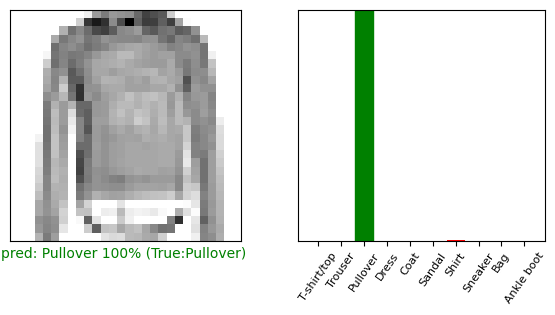

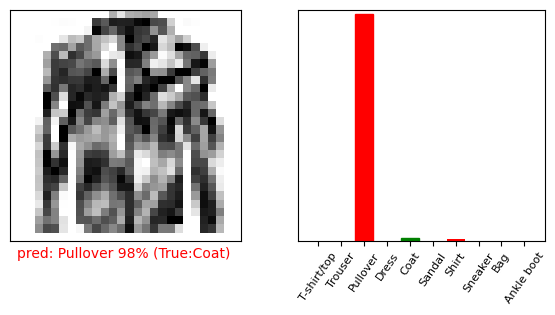

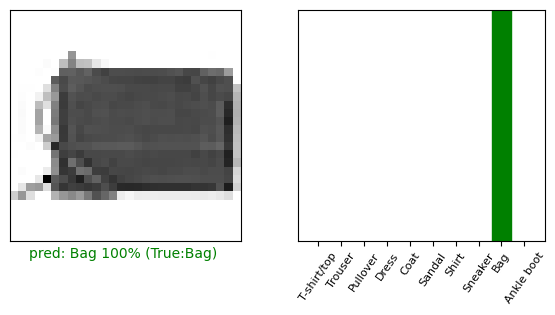

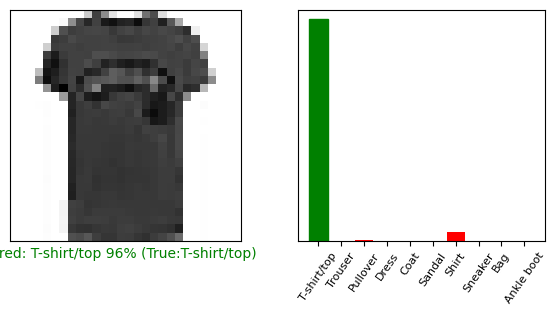

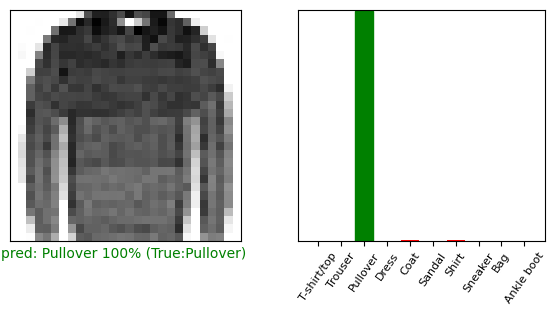

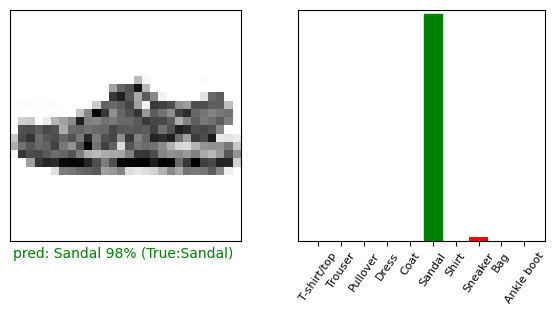

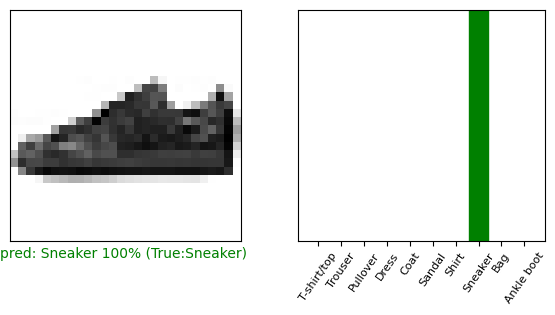

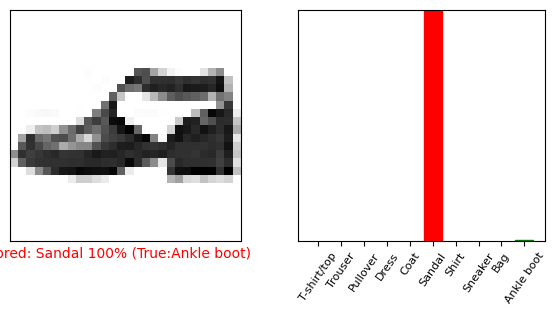

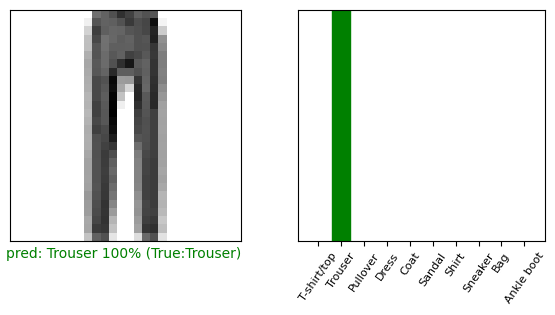

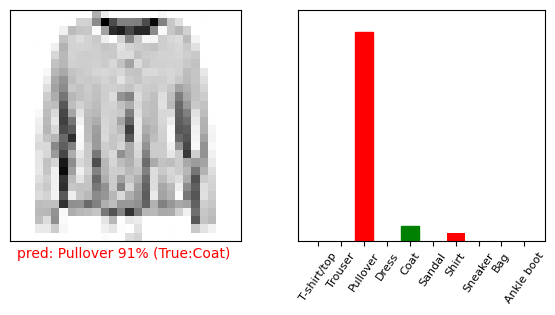

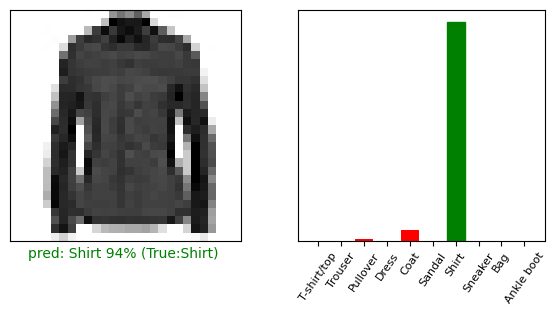

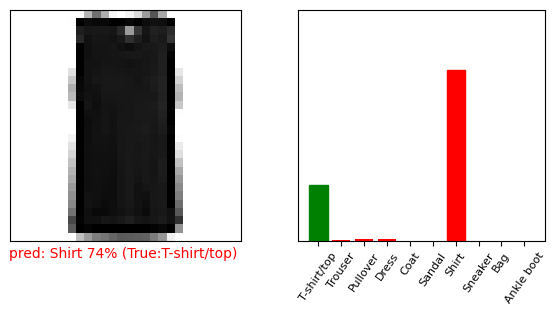

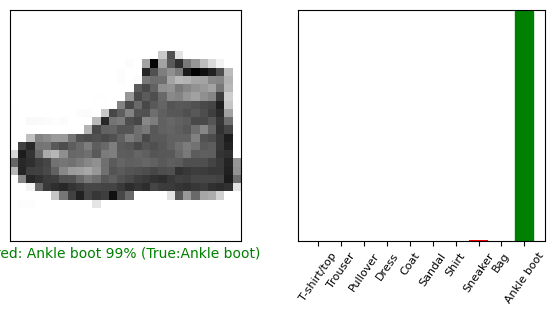

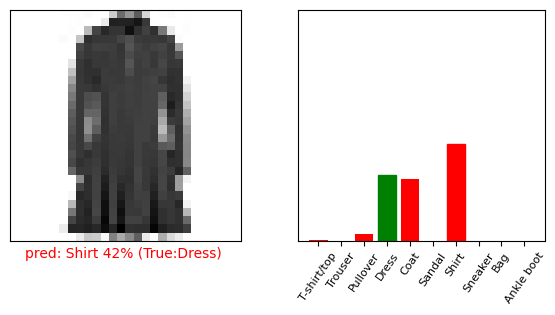

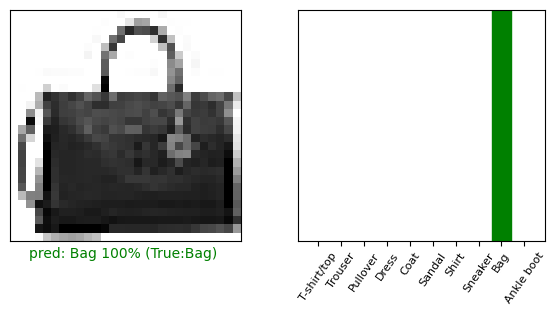

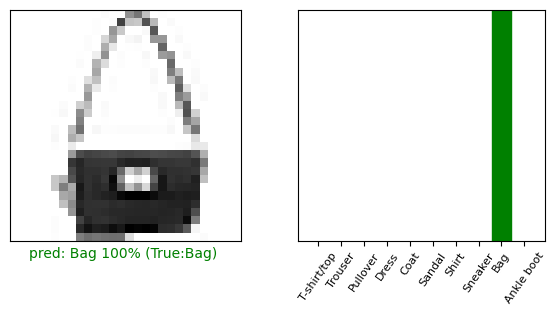

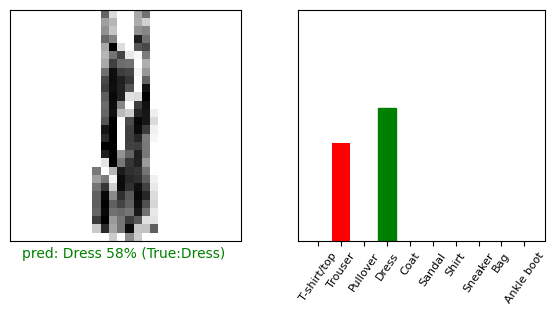

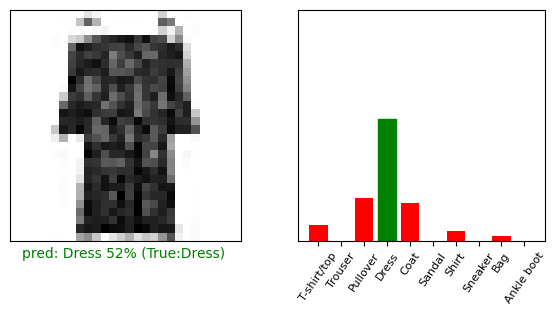

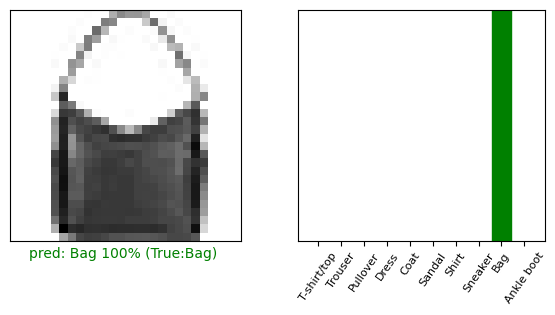

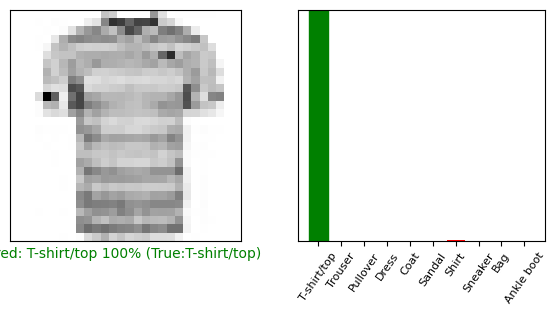

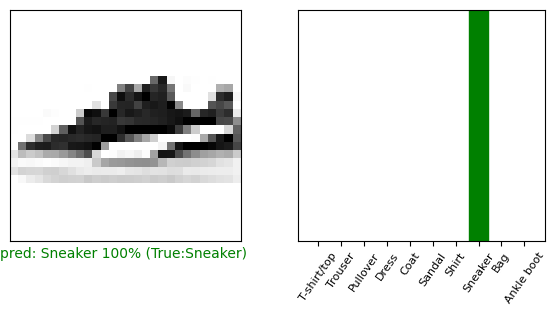

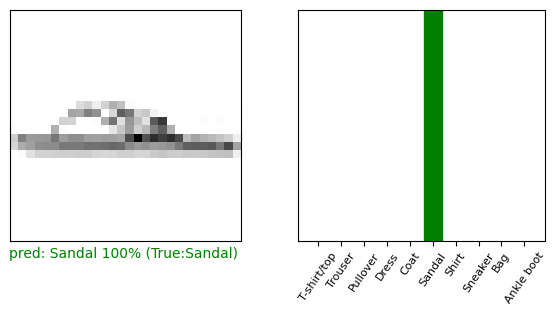

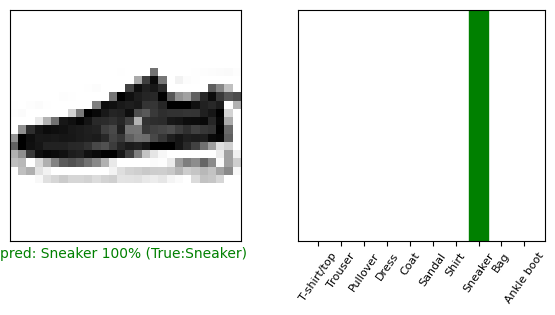

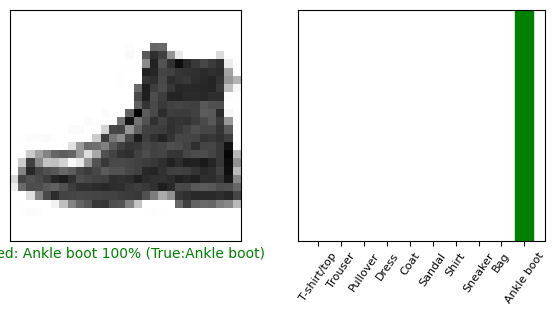

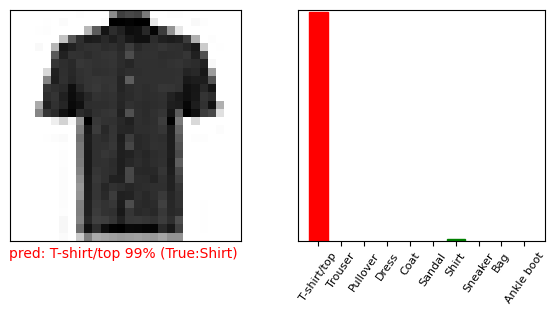

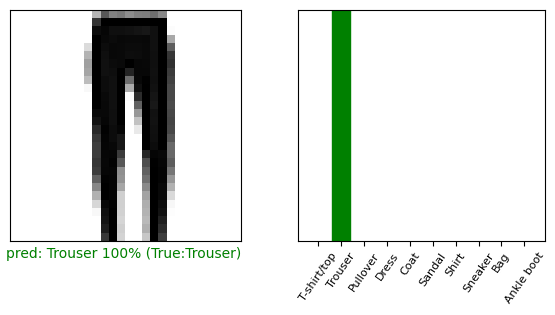

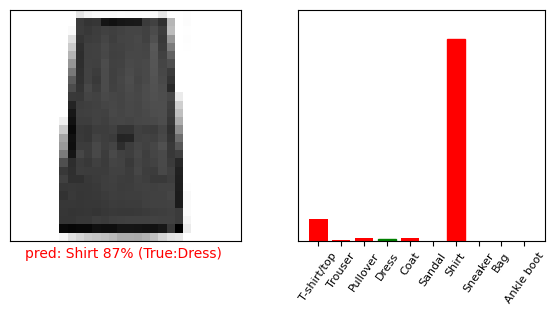

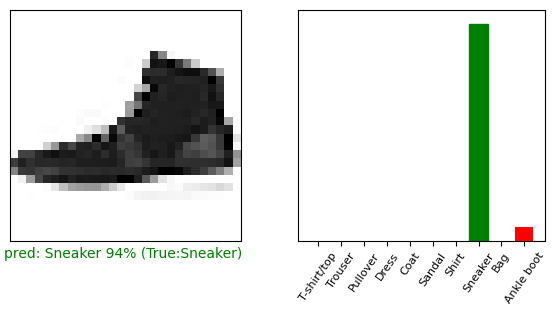

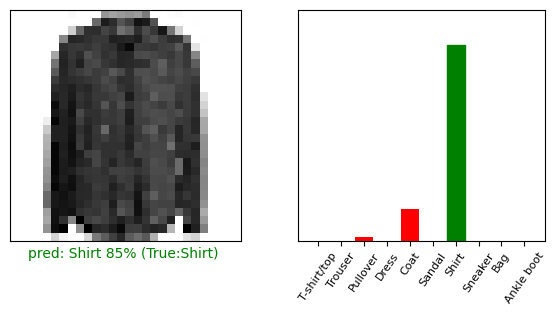

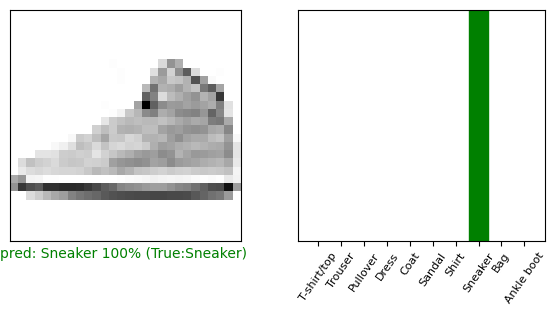

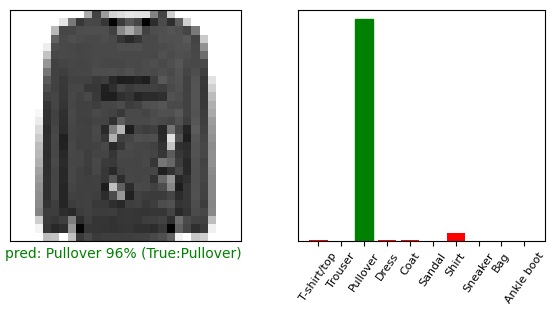

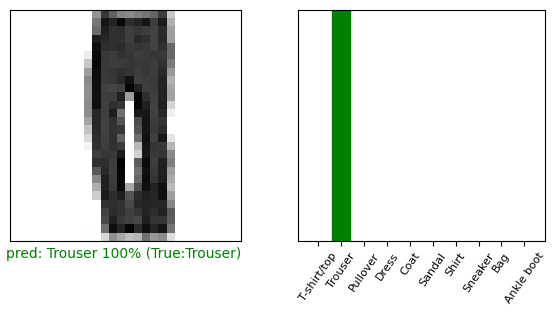

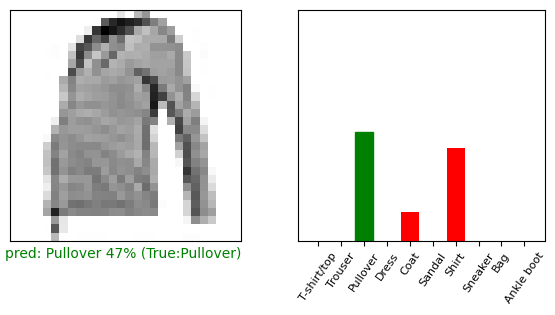

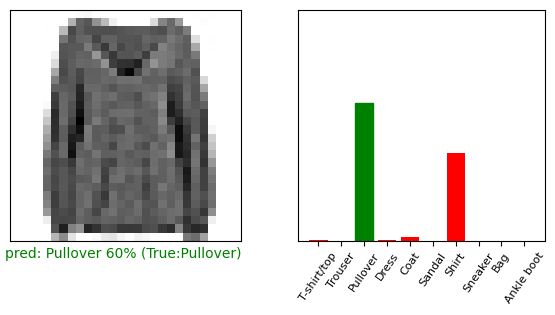

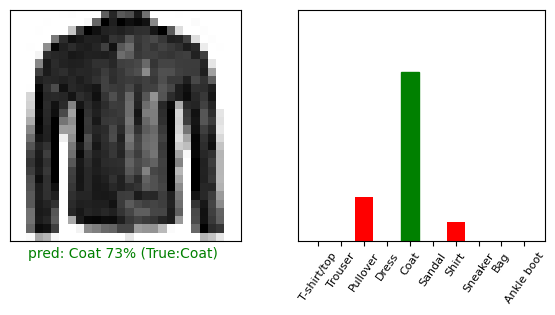

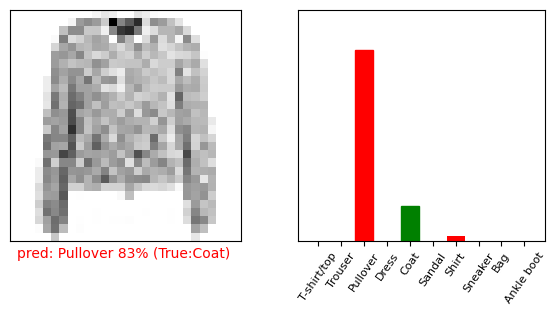

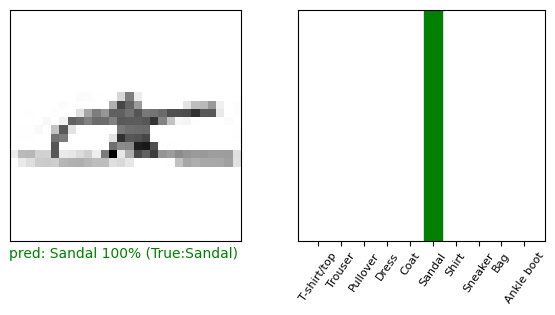

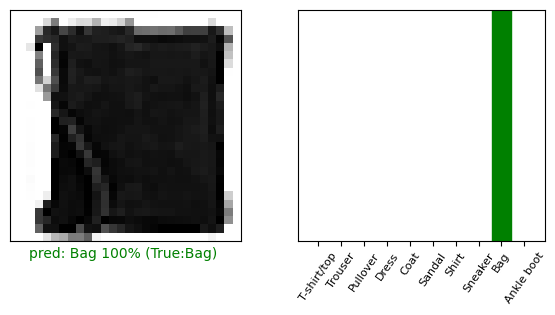

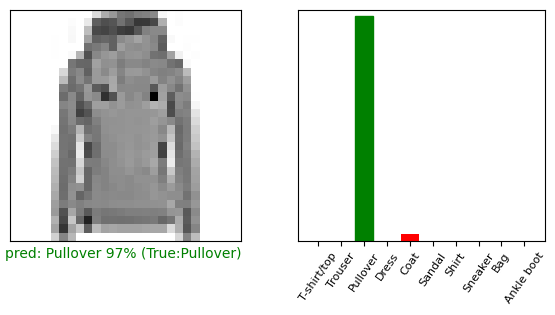

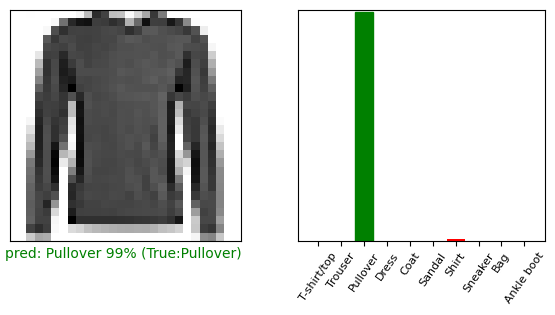

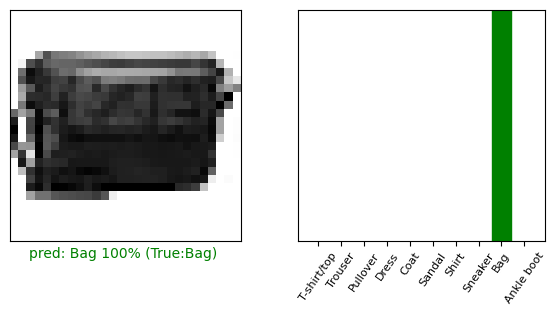

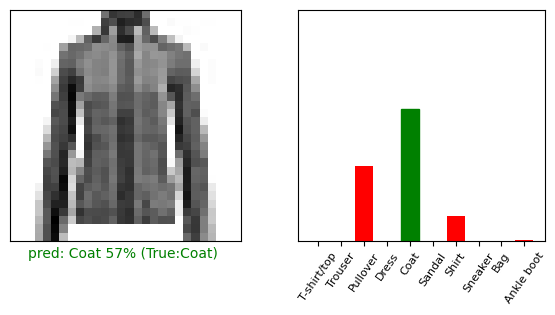

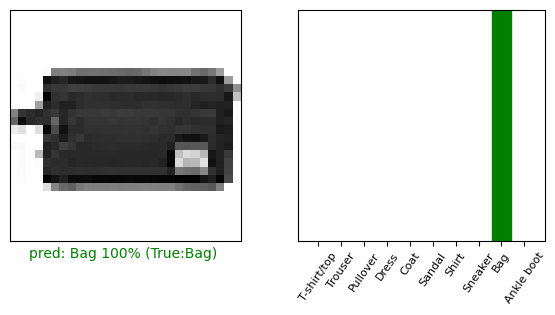

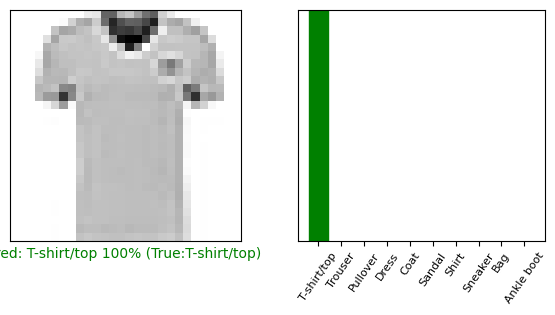

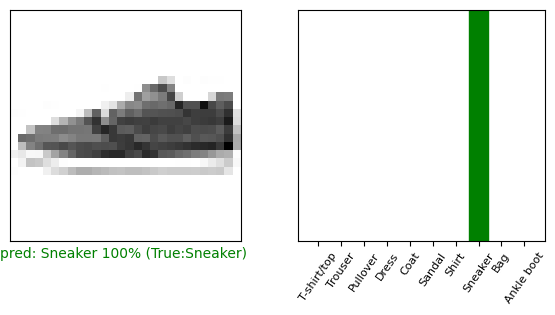

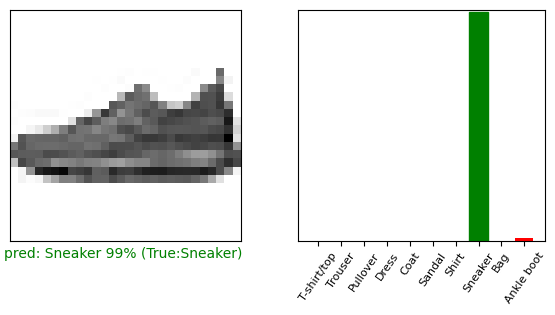

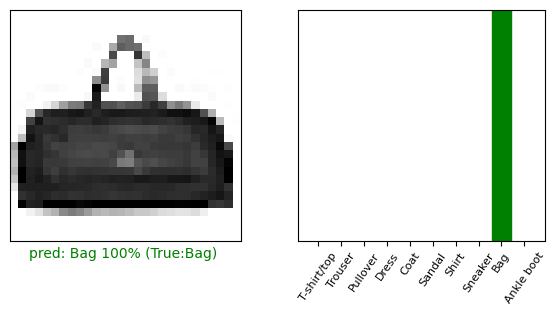

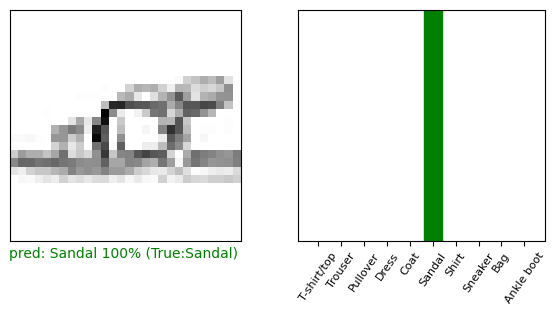

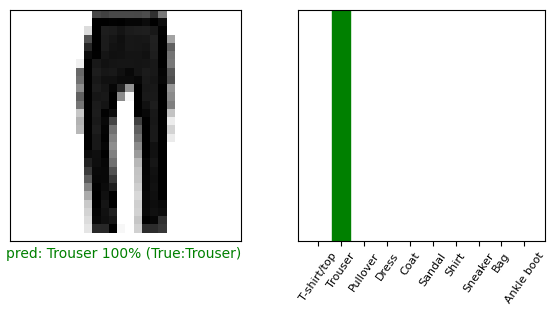

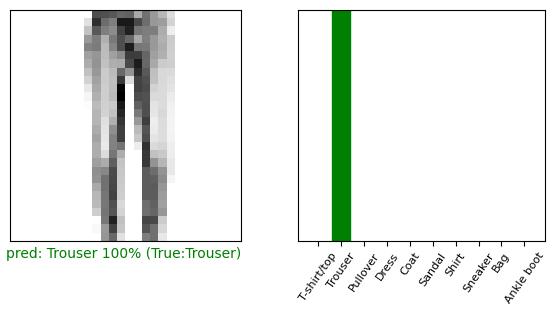

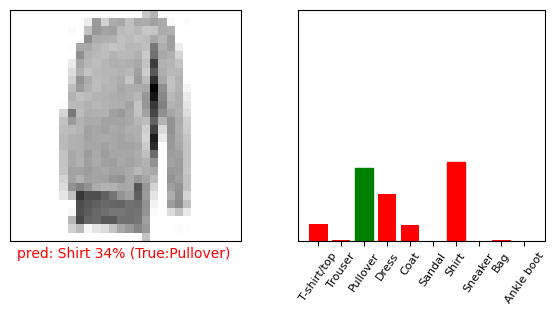

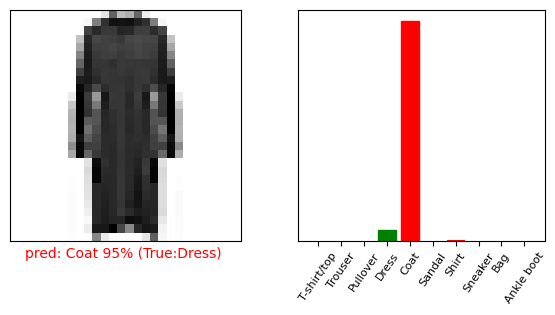

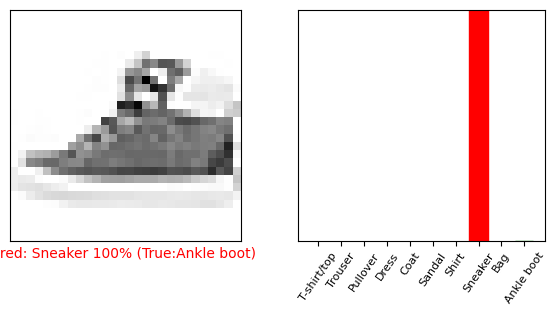

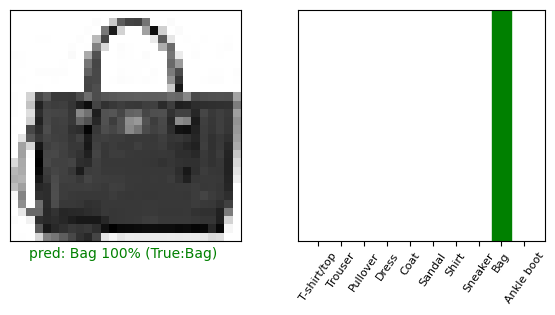

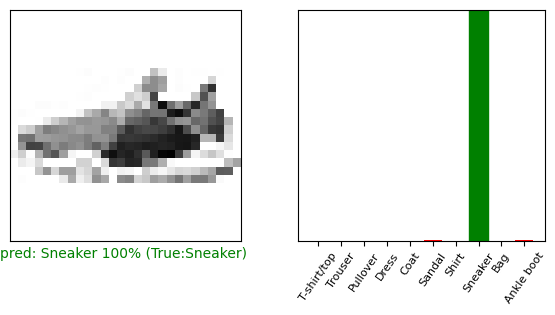

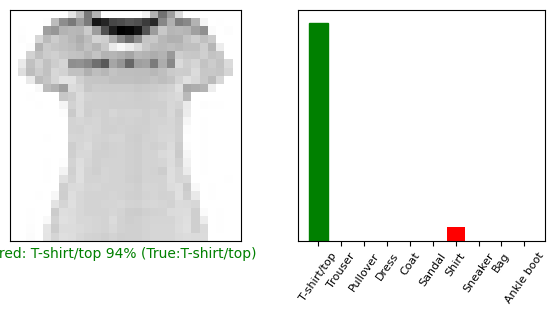

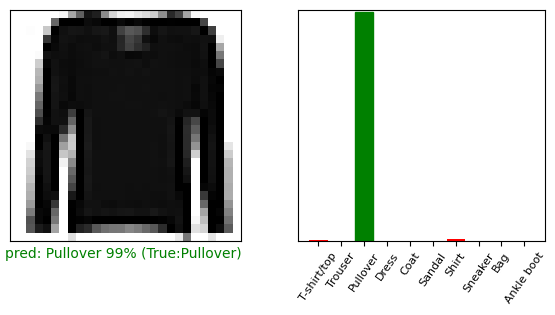

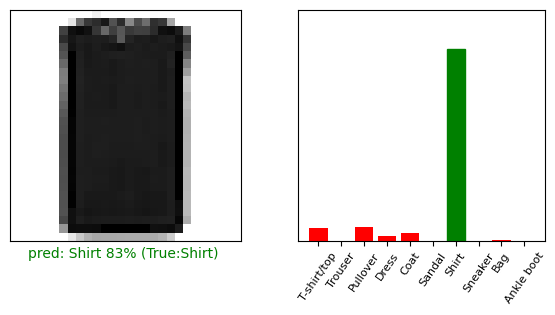

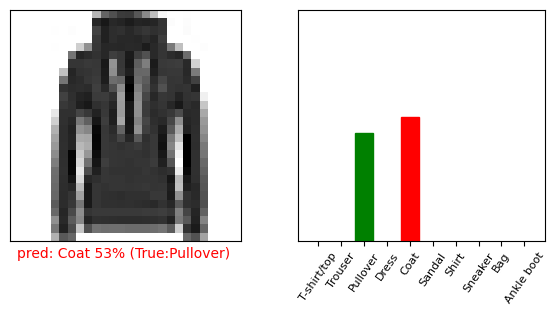

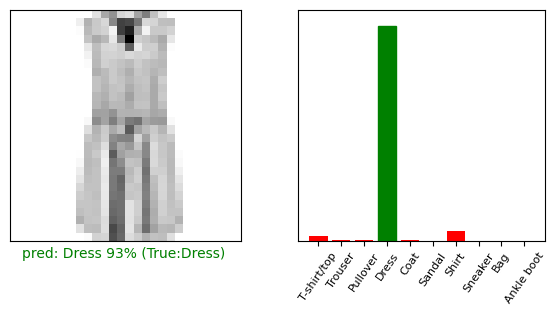

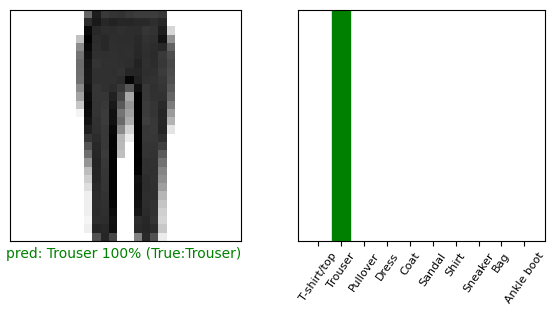

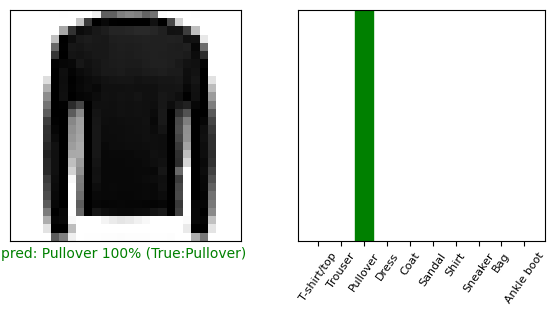

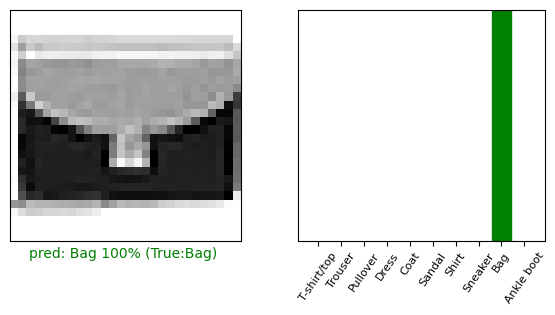

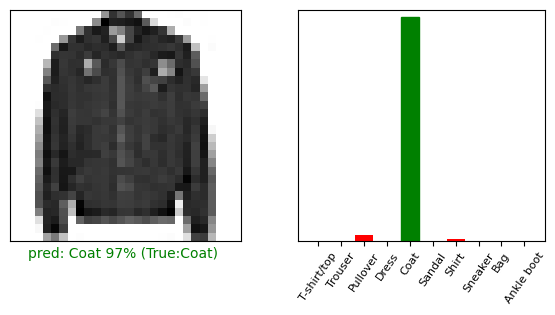

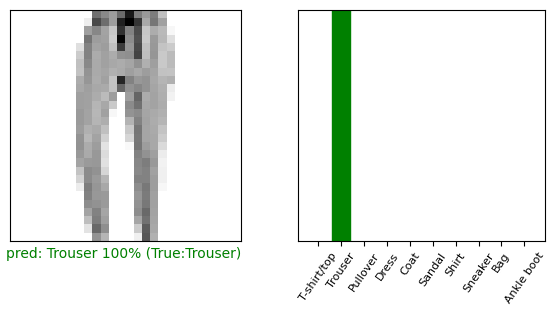

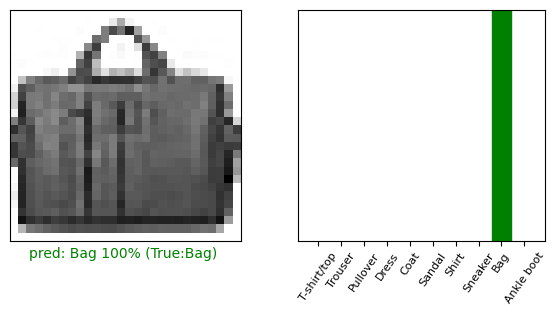

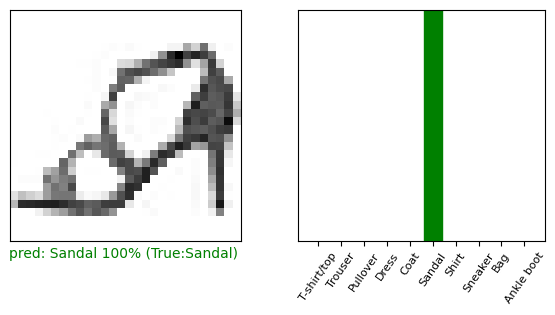

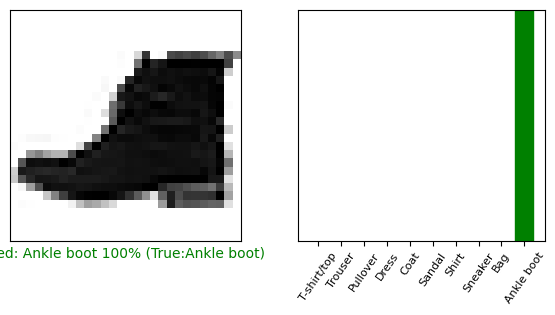

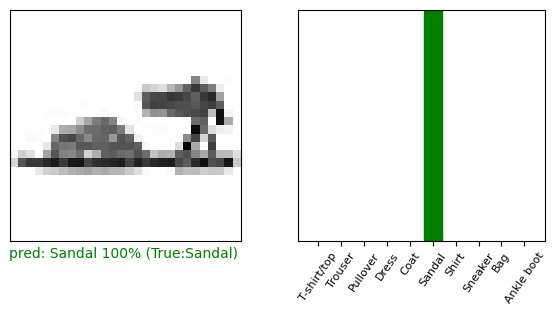

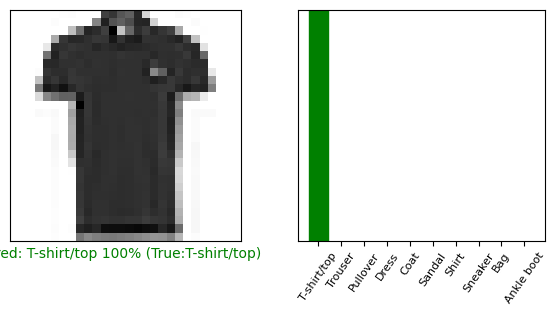

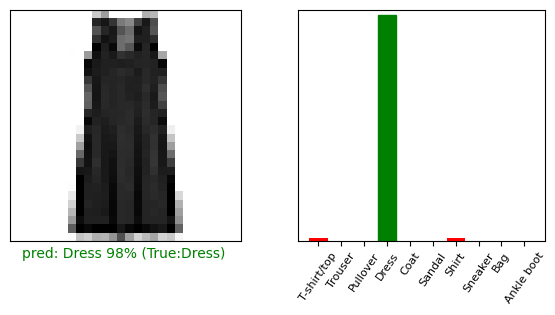

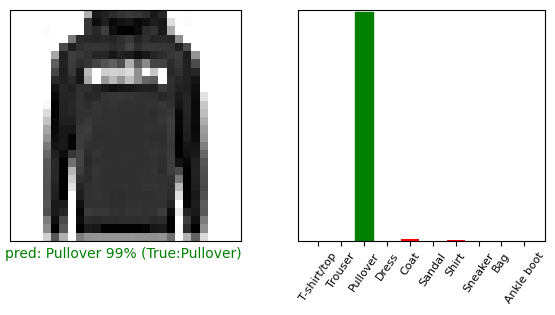

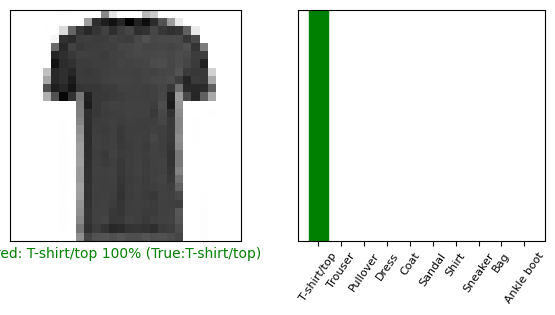

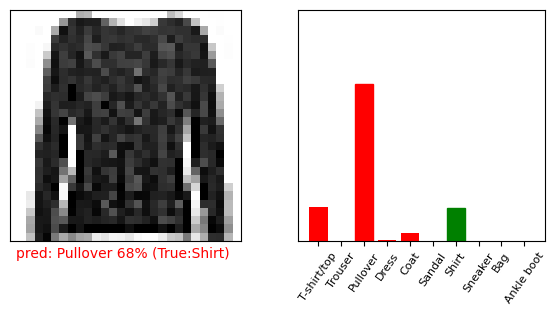

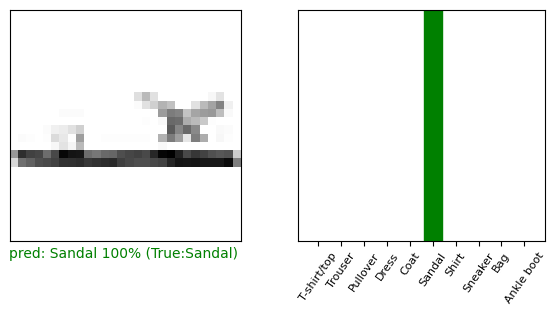

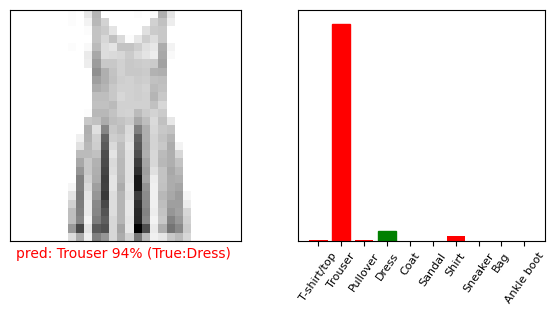

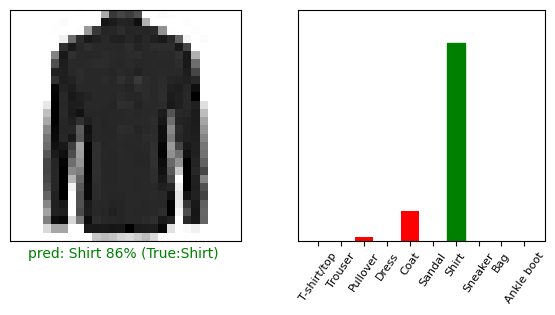

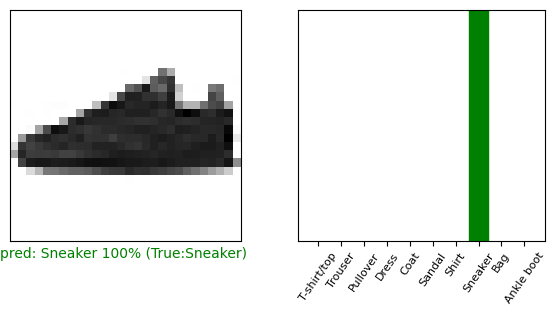

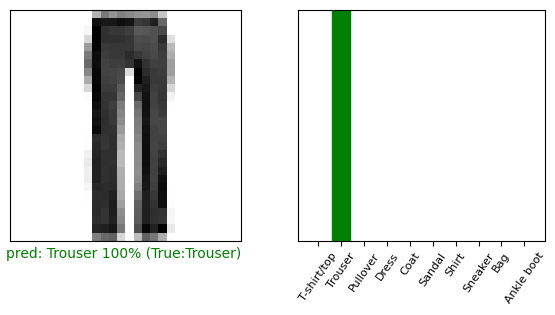

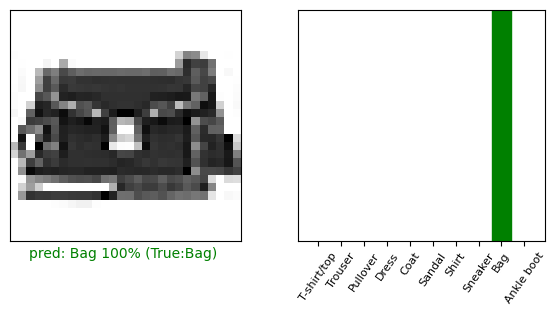

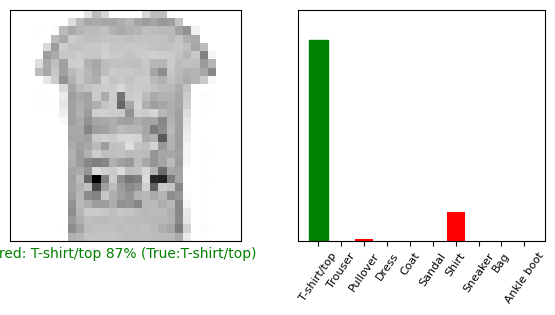

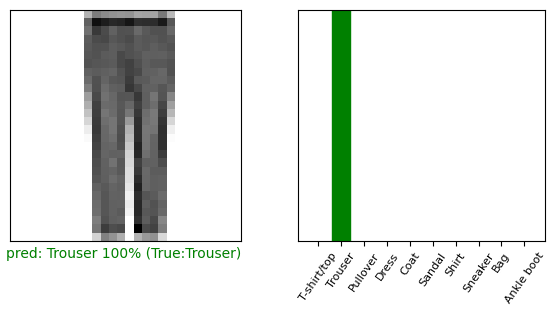

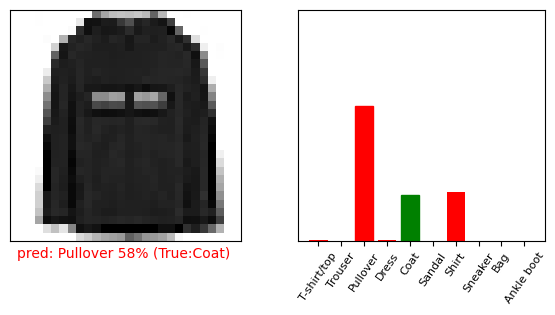

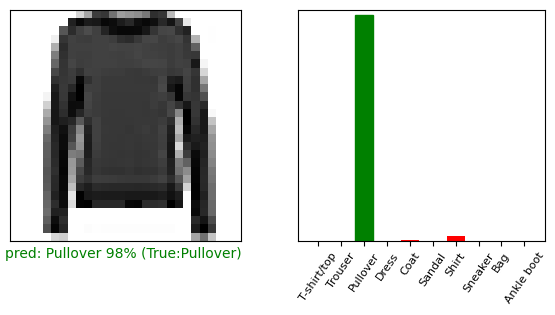

In [ ]:
for i in range(100):
  plt.figure(figsize=(7,3))
  plt.subplot(1,2,1)
  plot_image(i, y_predict2[i], y_test, x_test)
  plt.subplot(1,2,2)
  plot_value_array(i, y_predict2[i],  y_test)

  plt.show()

10000

#Summary report

Confusion matrix:


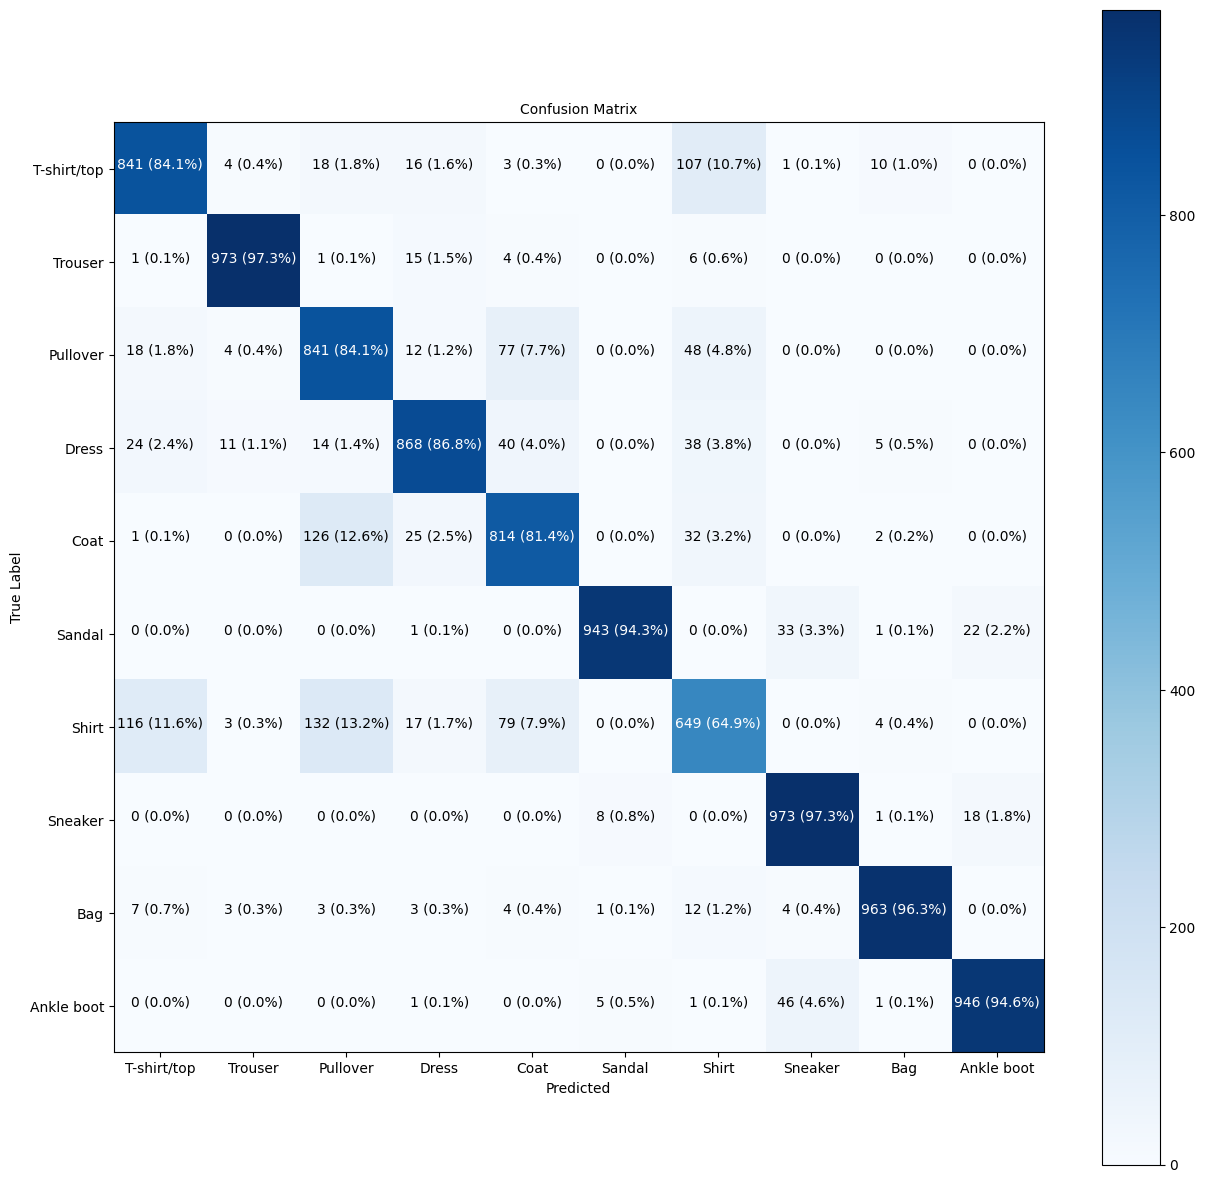

In [ ]:
createConfusionMatrix(y_true = y_test,
                      y_preds = y_preds,
                      classes = class_names,
                      figsize = (15,15),
                      text_size = 10)


In [ ]:
loss, accuracy = model2.evaluate(x_test, y_test)
print("accuracy  {:.2f}%".format(accuracy))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8790 - loss: 0.3770
accuracy  0.88%


In [ ]:
model2.summary()

weight, bias = model2.layers[3].get_weights()
weight.shape, bias.shape
weight[0]

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 252,182 (985.09 KB)

 Trainable params: 84,060 (328.36 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 168,122 (656.73 KB)

array([-0.32467818,  0.47433996, -0.20878583, -0.02520555,  0.06109904,
       -0.13860132, -0.19696839,  0.1763919 ,  0.49065483, -0.17071413],
      dtype=float32)